## 1. Load the data

In [1]:
import gzip
import pickle

In [2]:
f=gzip.open("mnist.pkl.gz",'rb')
f.seek(0)
training_data,validation_data,test_data=pickle.load(f,encoding='latin1')
f.close()

In [3]:
training_data

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 8, 4, 8], dtype=int64))

In [4]:
print("Feature data is :\n{0}".format(training_data[0]))

Feature data is :
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
print("Target data is :\n{0}".format(training_data[1]))

Target data is :
[5 0 4 ... 8 4 8]


In [6]:
print("Number of data points are: {0}".format(len(training_data[0])))

Number of data points are: 50000


In [7]:
print("Number of points in each data point are {0}".format(len(training_data[0][1])))

Number of points in each data point are 784


### Now we have to do one hot encoding of the target data

# The idea is to create 10*m matrix for m length data

In [8]:
import numpy as np

In [9]:
data=np.array([1,2,3,0])
n_cols=data.shape[0]# new array columns are equal to actual array length
new_array=np.zeros((10,n_cols))
index=0
for value in data:
    new_array[value][index]=1.0
    index+=1
print(new_array)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


## Let's create function for loading data and one-hot encoding

In [10]:
def load_data():
    f=gzip.open("mnist.pkl.gz",'rb')
    training_data,validation_data,test_data=pickle.load(f,encoding='latin1')
    f.close()
    return training_data,validation_data,test_data

In [11]:
def one_hot_encoding(data):
    n_cols=data.shape[0]# new array columns are equal to actual array length
    new_array=np.zeros((10,n_cols))
    index=0
    for value in data:
        new_array[value][index]=1.0
        index+=1
    return new_array

In [12]:
tr_d,val_d,tst_d=load_data()
tr_X=np.array(tr_d[0][:])

In [13]:
tr_X.shape

(50000, 784)

For implementation in Keras, the desired shape is m $\times$ n, where m is number of training samples and n is number of parts in each datapoint which looks absolutely clear, 50000 data points with each data point having 784 parts.

In [14]:
tr_y=one_hot_encoding(np.array(tr_d[1][:]))
tr_y.shape

(10, 50000)

We need to transpose the tr_y shape to m $\times$ n format

In [15]:
tr_y=tr_y.T
tr_y.shape

(50000, 10)

In [16]:
def wrap_up():
    tr_d,val_d,test_d=load_data()
    train_set_x=np.array(tr_d[0][:])
    train_results=np.array(tr_d[1][:])
    train_set_y=one_hot_encoding(train_results).T
    test_set_x=np.array(val_d[0][:])
    test_results=np.array(val_d[1][:])
    test_set_y=one_hot_encoding(test_results).T
    return train_set_x,train_set_y,test_set_x,test_set_y

In [17]:
train_set_x, train_set_y, test_set_x, test_set_y = wrap_up()

In [18]:
print("train_set_x shape {0}".format(train_set_x.shape))
print("train_set_y shape {0}".format(train_set_y.shape))
print("test_set_x shape {0}".format(test_set_x.shape))
print("test_set_y shape {0}".format(test_set_y.shape))

train_set_x shape (50000, 784)
train_set_y shape (50000, 10)
test_set_x shape (10000, 784)
test_set_y shape (10000, 10)


# 2. Visualize the data

In [19]:
import matplotlib.pyplot as plt

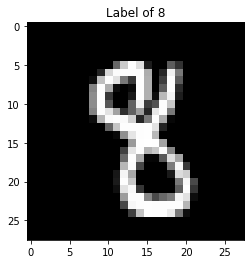

In [20]:
# change the index range from 0 to 49,999 to visualize different digits 
index=49999
k=train_set_x[index,:]
k=k.reshape((28,28))
plt.title('Label of {label}'.format(label=training_data[1][index]))
plt.imshow(k,cmap='gray')
plt.show()

# 3. Define the model

1. Models are defined in sequence of layers 

from keras.models import Sequential

nn_model = Sequential()

2. Number of components in input vector , here 28*28=784
3. Number of hidden layers as well as we want the connection to be Dense, every neuron in one layer is connected to every other neuron in adjacent layer. here we are adding 1 hidden layer with 35 neurons
4. Activation function 'relu'

from keras.layers import Dense

nn_model.add(Dense(35, input_dim=784, activation='relu'))


In [21]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [22]:
nn_model = Sequential()
nn_model.add(Dense(35, input_dim=784, activation='relu'))

from keras.layers import Dropout, BatchNormalization, Activation
5. If you want to use Dropout in particular layer

nn_model.add(Dropout(0.3)) # 0.3 is percentage of neurons that dropout
6. We can also add hidden layers, adding 1 hidden layer with 21 neurons

nn_model.add(Dense(21, activation='relu'))
7. We can also include regularization using the command

from keras import regularizers

nn_model.add(Dense(21, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

8. The last output layer is the softmax layer with 10 classes defined
nn_model.add(Dense(10, activation='softmax'))

In [23]:
from keras.layers import Dropout,BatchNormalization,Activation

In [24]:
nn_model.add(Dropout(0.3))
nn_model.add(Dense(21, activation = 'relu'))
nn_model.add(Dense(10, activation='softmax'))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<b>We have to compile the model on training dataset so we have to use different parameters, such as loss function , optimizer and evaluation metrics



In [25]:
nn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

<b> Now we can fit the model, on our training dataset

In [ ]:
nn_model.fit(train_set_x,train_set_y,epochs=12,batch_size=12)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/12
50000/50000 [==============================] - 20s 395us/step - loss: 0.4866 - acc: 0.8509
Epoch 2/12
50000/50000 [==============================] - 26s 519us/step - loss: 0.3089 - acc: 0.9055
Epoch 3/12
50000/50000 [==============================] - 25s 507us/step - loss: 0.2762 - acc: 0.9146
Epoch 4/12
50000/50000 [==============================] - 26s 521us/step - loss: 0.2556 - acc: 0.9202
Epoch 5/12
50000/50000 [==============================] - 39s 783us/step - loss: 0.2472 - acc: 0.9228
Epoch 6/12
50000/50000 [==============================] - 52s 1ms/step - loss: 0.2328 - acc: 0.9271
Epoch 7/12
50000/50000 [==============================] - 24s 489us/step - loss: 0.2269 - acc: 0.9285
Epoch 8/12
50000/50000 [==============================] - 28s 569us/step - loss: 0.2184 - acc: 0.9313
Epoch 9/12
50000/50000 [==============================] - 22s 436us/step - loss: 0.2132 - ac

# 4. Evaluate the model

In [ ]:
score_train=nn_model.evaluate(train_set_x,train_set_y)

In [ ]:
score_train

In [ ]:
nn_model.metrics_names

In [ ]:
print("{0} :{1}%".format(nn_model.metrics_names[1],score_train[1]*100))

# 5. Evaluate on test dataset

In [ ]:
score_test=nn_model.evaluate(test_set_x,test_set_y)

In [ ]:
print("{0} :{1}%".format(nn_model.metrics_names[1],score_test[1]*100))

##  Model has achieved 96.44% accuracy

# 6. Check predictions and look for wrong predictions

In [ ]:
prediction=nn_model.predict(test_set_x)

In [ ]:
prediction

In [ ]:
prediction.shape

In [ ]:
np.argmax([0.2,0.3,0.4,0.1])

0.2+0.3+0.4+0.1=1
0.4 has maximum probability hence the the index 2 is its value similarly each data point is to be evaluated along its column

In [ ]:
prediction=np.argmax(prediction,axis=1)

In [ ]:
prediction

In [ ]:
test_labels=np.argmax(test_set_y,axis=1)

In [ ]:
test_labels

In [ ]:
test_set_x.shape

In [ ]:
index=188
k=test_set_x[index,:]
k=k.reshape((28,28))
plt.title("Label is {label}".format(label=(test_labels[index],prediction[index])))
plt.imshow(k,cmap='grey')

You can change values to see which vsalues have been misclassified